In [1]:
!pip install pandas fredapi numpy matplotlib seaborn plotly prophet scikit-learn statsmodels

# STEP 2: Import Libraries

In [2]:
import pandas as pd
import numpy as np
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")


✅ All libraries imported successfully!
Pandas version: 2.3.3


In [4]:
import pandas as pd
from fredapi import Fred

fred = Fred(api_key='54a6578aaa4821d9a2973db16ebb629f')

# Collect data
unemployment = fred.get_series('UNRATE')
cpi = fred.get_series('CPIAUCSL')
gdp = fred.get_series('GDP')
ffr = fred.get_series('FEDFUNDS')
hst = fred.get_series('HOUST')
dff = fred.get_series('DFF')
gdpnow = fred.get_series('GDPNOW')
consumer = fred.get_series('UMCSENT')
ind_pro = fred.get_series('INDPRO')
pym = fred.get_series('PAYEMS')

# Combine into one DataFrame
economic_data = pd.concat([
    unemployment.rename('unemployment'),
    cpi.rename('cpi'),
    gdp.rename('gdp'),
    ffr.rename('ffr'),
    hst.rename('hst'),
    dff.rename('dff'),
    gdpnow.rename('gdpnow'),
    consumer.rename('consumer'),
    ind_pro.rename('ind_pro'),
    pym.rename('pym')
], axis=1)

# 🔄 Resample everything to monthly frequency
economic_data_monthly = economic_data.resample('ME').mean()

# ============================================
# STEP 3: Set Up FRED API
# Get your free API key from: https://fred.stlouisfed.org/docs/api/api_key.html
# ============================================


In [5]:
# Replace 'YOUR_API_KEY_HERE' with your actual FRED API key
FRED_API_KEY = '54a6578aaa4821d9a2973db16ebb629f'

print("✅ FRED API initialized!")



✅ FRED API initialized!


# ============================================
# STEP 4: Test the Connection
# ============================================

In [6]:
# Test by fetching unemployment rate data
try:
    unemployment = fred.get_series('UNRATE', observation_start='2020-01-01')
    print(f"✅ Successfully fetched {len(unemployment)} data points for unemployment rate")
    print(f"\nLatest unemployment rate: {unemployment.iloc[-1]:.1f}%")
    print(f"Date: {unemployment.index[-1].strftime('%B %Y')}")
except Exception as e:
    print(f"❌ Error: {e}")
    print("Make sure you've replaced '54a6578aaa4821d9a2973db16ebb629f' with your actual API key")


✅ Successfully fetched 69 data points for unemployment rate

Latest unemployment rate: 4.4%
Date: September 2025


# ============================================
# STEP 5: Fetch Multiple Economic Indicators
# ============================================


In [ ]:
def fetch_economic_data(start_date='2010-01-01'):
    """
    Fetch key economic indicators from FRED
    
    Parameters:
    -----------
    start_date : str
        Start date for data collection (format: 'YYYY-MM-DD')
    
    Returns:
    --------
    pd.DataFrame
        DataFrame with all economic indicators
    """
    
    indicators = {
        'UNRATE': 'Unemployment Rate',
        'CPIAUCSL': 'Consumer Price Index',
        'GDP': 'Gross Domestic Product',
        'FEDFUNDS': 'Federal Funds Rate',
        'HOUST': 'Housing Starts',
        'DFF': 'Federal Funds Effective Rate',
        'GDPNOW': 'GDPNow',
        'UMCSENT': 'Consumer Sentiment',
        'INDPRO': 'Industrial Production',
        'PAYEMS': 'Total Nonfarm Payrolls'
    }
    
    data_dict = {}
    
    print("Fetching economic indicators from FRED...")
    for code, name in indicators.items():
        try:
            series = fred.get_series(code, observation_start=start_date)
            data_dict[name] = series
            print(f"✅ {name}: {len(series)} observations")
        except Exception as e:
            print(f"❌ {name}: Error - {e}")


In [7]:
def fetch_economic_data(start_date='2010-01-01'):
    """
    Fetch key economic indicators from FRED
    
    Parameters:
    -----------
    start_date : str
        Start date for data collection (format: 'YYYY-MM-DD')
    
    Returns:
    --------
    pd.DataFrame
        DataFrame with all economic indicators
    """
    
    indicators = {
        'UNRATE': 'Unemployment Rate',
        'CPIAUCSL': 'Consumer Price Index',
        'GDP': 'Gross Domestic Product',
        'FEDFUNDS': 'Federal Funds Rate',
        'HOUST': 'Housing Starts',
        'DFF': 'Federal Funds Effective Rate',
        'GDPNOW': 'GDPNow',
        'UMCSENT': 'Consumer Sentiment',
        'INDPRO': 'Industrial Production',
        'PAYEMS': 'Total Nonfarm Payrolls'
    }
    
    data_dict = {}
    
    print("Fetching economic indicators from FRED...")
    for code, name in indicators.items():
        try:
            series = fred.get_series(code, observation_start=start_date)
            data_dict[name] = series
            print(f"✅ {name}: {len(series)} observations")
        except Exception as e:
            print(f"❌ {name}: Error - {e}")
    
    # Combine into DataFrame
    df = pd.DataFrame(data_dict)
    
    print(f"\n✅ Total data shape: {df.shape}")
    print(f"Date range: {df.index.min().date()} to {df.index.max().date()}")
    
    return df

In [8]:
# Fetch the data
economic_data = fetch_economic_data()


Fetching economic indicators from FRED...
✅ Unemployment Rate: 189 observations
✅ Consumer Price Index: 189 observations
✅ Gross Domestic Product: 62 observations
✅ Federal Funds Rate: 190 observations
✅ Housing Starts: 188 observations
✅ Federal Funds Effective Rate: 5810 observations
✅ GDPNow: 57 observations
✅ Consumer Sentiment: 190 observations
✅ Industrial Production: 188 observations
✅ Total Nonfarm Payrolls: 189 observations

✅ Total data shape: (5810, 10)
Date range: 2010-01-01 to 2025-11-27


In [9]:
# Display first few rows
print("\n📊 Sample of Economic Data:")
economic_data.head()



📊 Sample of Economic Data:


,Unemployment Rate,Consumer Price Index,Gross Domestic Product,Federal Funds Rate,Housing Starts,Federal Funds Effective Rate,GDPNow,Consumer Sentiment,Industrial Production,Total Nonfarm Payrolls
2010-01-01,9.8,217.488,14764.61,0.11,614.0,0.05,NaN,74.4,89.3426,129802.0
2010-01-02,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN
2010-01-03,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN


# ============================================
# STEP 6: Quick Data Visualization
# ============================================


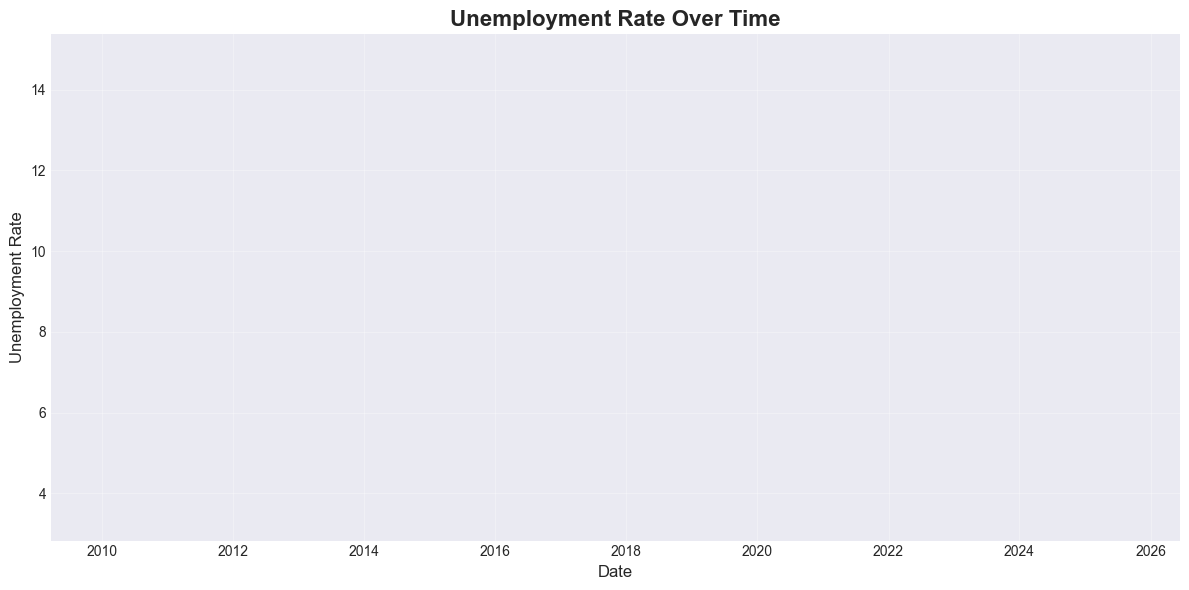

In [10]:
def plot_economic_indicator(df, column_name):
    """
    Create a simple time series plot
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column_name], linewidth=2)
    plt.title(f'{column_name} Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example: Plot unemployment rate
if 'Unemployment Rate' in economic_data.columns:
    plot_economic_indicator(economic_data, 'Unemployment Rate')


# ============================================
# STEP 6b: Resample with monthly date index
# ============================================


In [11]:
# 🔄 Resample everything to monthly frequency
economic_data_monthly = economic_data.resample('ME').mean()

print(economic_data_monthly.tail())


            Unemployment Rate  Consumer Price Index  Gross Domestic Product  \
2025-07-31                4.2               322.132                     NaN   
2025-08-31                4.3               323.364                     NaN   
2025-09-30                4.4               324.368                     NaN   
2025-10-31                NaN                   NaN                     NaN   
2025-11-30                NaN                   NaN                     NaN   

            Federal Funds Rate  Housing Starts  Federal Funds Effective Rate  \
2025-07-31                4.33          1429.0                      4.330000   
2025-08-31                4.33          1307.0                      4.330000   
2025-09-30                4.22             NaN                      4.224667   
2025-10-31                4.09             NaN                      4.088065   
2025-11-30                 NaN             NaN                      3.874815   

            GDPNow  Consumer Sentiment  Indu

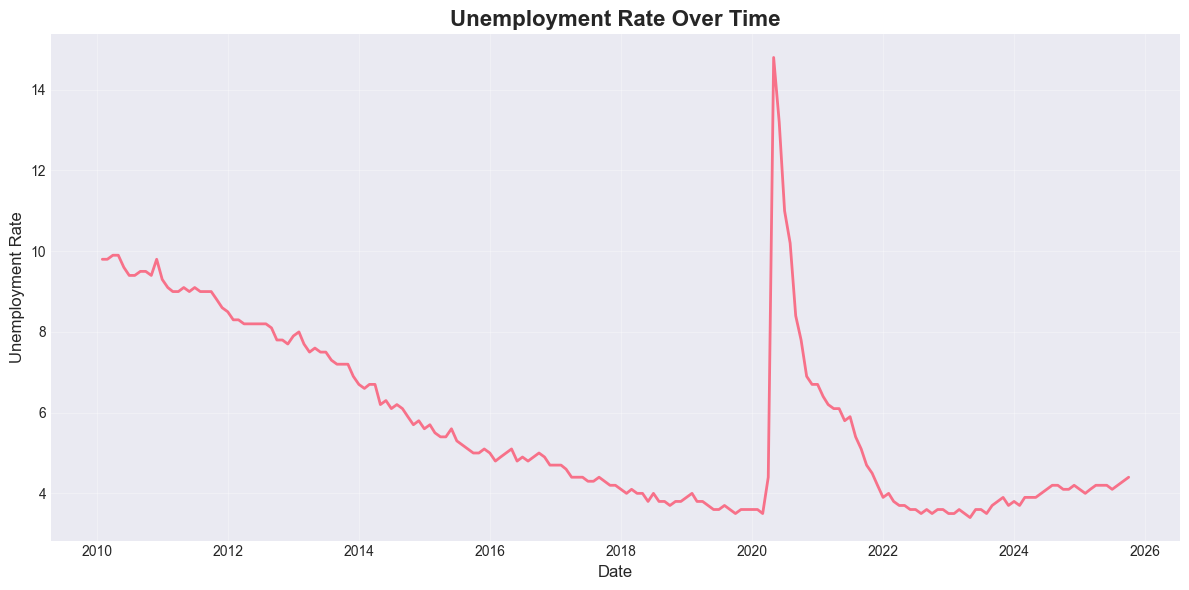

In [12]:
def plot_economic_indicator(df, column_name):
    """
    Create a simple time series plot
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column_name], linewidth=2)
    plt.title(f'{column_name} Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example: Plot unemployment rate
if 'Unemployment Rate' in economic_data_monthly.columns:
    plot_economic_indicator(economic_data_monthly, 'Unemployment Rate')


In [13]:
# Display first few rows
print("\n📊 Sample of Economic Data:")
economic_data_monthly.tail()



📊 Sample of Economic Data:


,Unemployment Rate,Consumer Price Index,Gross Domestic Product,Federal Funds Rate,Housing Starts,Federal Funds Effective Rate,GDPNow,Consumer Sentiment,Industrial Production,Total Nonfarm Payrolls
2025-07-31,4.2,322.132,NaN,4.33,1429.0,4.330000,4.0229,61.7,101.3472,159511.0
2025-08-31,4.3,323.364,NaN,4.33,1307.0,4.330000,NaN,58.2,101.2704,159507.0
2025-09-30,4.4,324.368,NaN,4.22,NaN,4.224667,NaN,55.1,NaN,159626.0
2025-10-31,NaN,NaN,NaN,4.09,NaN,4.088065,NaN,53.6,NaN,NaN
2025-11-30,NaN,NaN,NaN,NaN,NaN,3.874815,NaN,NaN,NaN,NaN


# ============================================
# STEP 7a: Data Summary Statistics a
# ============================================


In [14]:
print("\n📈 Summary Statistics:")
print(economic_data.describe())

print("\n🔍 Missing Values:")
print(economic_data.isnull().sum())

print("\n📅 Data Frequency:")
print(f"Total observations: {len(economic_data)}")
print(f"Date range: {(economic_data.index.max() - economic_data.index.min()).days} days")



📈 Summary Statistics:
       Unemployment Rate  Consumer Price Index  Gross Domestic Product  \
count         189.000000            189.000000               62.000000   
mean            5.721693            257.325614            20883.681113   
std             2.209651             31.246571             4606.917964   
min             3.400000            217.199000            14764.610000   
25%             3.900000            234.719000            17193.448750   
50%             4.900000            247.284000            19825.443000   
75%             7.500000            276.528000            23843.261750   
max            14.800000            324.368000            30485.729000   

       Federal Funds Rate  Housing Starts  Federal Funds Effective Rate  \
count          190.000000      188.000000                   5810.000000   
mean             1.390632     1161.276596                      1.402688   
std              1.806831      317.727270                      1.807945   
min       

# ============================================
# STEP 7b: Data Summary Statistics b
# ============================================


In [15]:
print("\n📈 Summary Statistics:")
print(economic_data_monthly.describe())

print("\n🔍 Missing Values:")
print(economic_data_monthly.isnull().sum())

print("\n📅 Data Frequency:")
print(f"Total observations: {len(economic_data_monthly)}")
print(f"Date range: {(economic_data_monthly.index.max() - economic_data_monthly.index.min()).days} days")



📈 Summary Statistics:
       Unemployment Rate  Consumer Price Index  Gross Domestic Product  \
count         189.000000            189.000000               62.000000   
mean            5.721693            257.325614            20883.681113   
std             2.209651             31.246571             4606.917964   
min             3.400000            217.199000            14764.610000   
25%             3.900000            234.719000            17193.448750   
50%             4.900000            247.284000            19825.443000   
75%             7.500000            276.528000            23843.261750   
max            14.800000            324.368000            30485.729000   

       Federal Funds Rate  Housing Starts  Federal Funds Effective Rate  \
count          190.000000      188.000000                    191.000000   
mean             1.390632     1161.276596                      1.403399   
std              1.806831      317.727270                      1.811026   
min       

# ============================================
# BONUS: Save Data to CSV
# ============================================


In [16]:
# Save to CSV for future use
economic_data.to_csv('economic_indicators.csv')
print("\n💾 Data saved to 'economic_indicators.csv'")



💾 Data saved to 'economic_indicators.csv'


In [17]:
# Save to CSV for future use
economic_data_monthly.to_csv('economic_indicators_timeseries.csv')
print("\n💾 Data saved to 'economic_indicators_timeseries.csv'")



💾 Data saved to 'economic_indicators_timeseries.csv'


In [18]:
print("\n" + "="*50)
print("🎉 SETUP COMPLETE!")
print("="*50)
print("\nNext steps:")
print("1. Explore the data further")
print("2. Create visualizations")
print("3. Build forecasting models")
print("4. Check out the project guide for detailed instructions!")


🎉 SETUP COMPLETE!

Next steps:
1. Explore the data further
2. Create visualizations
3. Build forecasting models
4. Check out the project guide for detailed instructions!
